<a href="https://colab.research.google.com/github/silverA-01/TIL/blob/main/machine-learning/05_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류(Classification) 알고리즘

분류는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터값이 주어졌을 때 미지의 레이블 값을 예측한다.


## 1. 결정트리(Decision Tree)
- (학습) **데이터를 학습해 데이터에 있는 규칙을 자동으로 찾아내는** 트리 기반의 분류 규칙을 만든다.
  - 데이터에 있는 규칙은 보통 실수값에 대한 부등호로 표현된다.
  - 트리 기반이기 때문에 분류 규칙에 따라 데이터들이 트리의 각 노드에 분류된다.
  - 노드는 데이터의 집합
- **데이터의 어떤 기준(피처)을 바탕으로 규칙을 만들어야** 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

### 결정 트리의 노드
1. **루트 노드(Root Node)**
  - 트리에 제일 시작이 되는 규칙 노드
  - 모든 노드와 연결되어 있는 노드로 모든 데이터 정보를 갖고 있다.
2. **규칙 노드(Rule Node)**
  - 데이터를 분류할 규칙을 만들어 주는 노드
3. **리프 노드(Leaf Node)**
  - 의사결정을 하지 않는 트리의 가장 마지막에 위치하는 노드.
  - 더 이상 분류를 위한 규칙을 생성할 수 없어 결정된 데이터의 분류값이 들어있는 노드

### 결정 트리의 깊이(Depth)
- 새로운 규칙 조건마다 규칙 노드 기반의 **서브 트리(브랜치)가 생성**된다.
- 규칙 노드에 의해 서브 트리가 생성되면 **깊이가 증가**한다.
- 트리의 깊이가 증가할 수록 규칙이 많아지기 때문에 **모델의 복잡도가 높아져 과대적합에 걸릴 확률이 높아진다.**
  - 결정 트리 클래스의 매개변수 `max_depth`를 조정하여 과대적합을 예방해야 한다.

### 균일도 기반 규칙 조건
- 결정 트리는 정보 균일도가 높은 규칙을 우선시한다.
- 정보 균일도를 측정하는 방법으로 정보 이득 지수, 지니 계수를 사용한다.
  - 정보 이득은 옛날에 많이 사용하던 개념이고, 현재는 지니 계수를 더 많이 사용한다.

1. **정보 이득(Information Gain) 지수**
  - 정보 이득은 엔트로피(혼잡도/복잡도)라는 개념을 기반으로 주어진 데이터의 혼잡도를 사용한다.
  - 서로 다른 값이 섞여 있을 수록 엔트로피가 높다.
  - 서로 같은 값이 섞여 있을 수록 엔트로피가 낮다.
  - 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다.
    - 엔트로피 지수는 0에서 1사이의 값으로 수치화한다.
    - 즉, 엔트로피가 낮을 수록 정보 이득 지수가 높고, 엔트로피가 높을 수록 정보 이득 지수가 낮다.
  - 결정 트리는 **정보 이득 지수가 높은 데이터의 속성(피처)을 기준으로 데이터를 분할**한다.

2. **지니 계수**
  - 지니 계수는 원래 경제학에서 빈부격차를 수치화하기 위한 불평둥 지수를 나타낼 때 사용하는 지수이다.
    - 0이 가장 평등하고 1로 갈 수록 불평등하다고 본다.
  - 머신러닝에서는 지니계수가 0에 가까워질 수록 데이터의 균일도가 높다고보고, 1에 가까워질 수록 데이터의 균일도가 낮은 복잡한 데이터라고 해석한다.
    - 0이 가장 균일하고 1이 가장 균일하지 않은 혼잡(복잡)하다고 본다.
  - 결정 트리는 **지니계수가 낮은 데이터 속성(피처)을 기준으로 분할**한다.


### 특성 중요도(Feature Importance)
- 머신러닝 알고리즘에서 데이터를 분할하기 위해 각 feature 데이터의 특성이 클래스를 나누는데 얼마나 영향을 미쳤는지를 표기하는 척도

- 결정 트리는 정보 이득 지수 혹은 지니계수에 따른 **높은 특성 중요도(Feature Importance)를 가진 피처 기준으로 데이터를 분할**한다.
  - 정보 이득 지수가 높은 피처 혹은 지니계수가 낮은 피처일수록 특성 중요도가 높다.

- 사이킷런에서 모델의 `feature_importances_`으로 확인할 수 있다.

### 결정트리의 규칙 노드 생성 프로세스
- 아래 프로세스는 지니 계수를 사용한 경우이다.
- 모든 데이터 집합(노드)의 분류가 결정될 때까지 아래 단계를 반복한다.
  - 모든 규칙 노드가 리프 노드가 될 때까지 반복
1. 1단계 : 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인한다.
  - 노드 내 데이터의 균일도를 지니 계수로 확인한다.
2. 2단계
  - 지니 계수가 0 일 때(데이터 집합의 모든 아이템이 한 종류) 리프 노드로 만들어서 분류를 결정한다.
  - 지니 계수가 0이 아닐 때(데이터 집합의 아이템이 여러 종류) 데이터를 분할하는데 가장 좋은 데이터 속성(피처)과 분할 기준을 찾는다.
    - 지니 계수를 활용해 높은 피처 중요도를 가진 피처를 찾고 분할 기준(규칙)을 찾는다.
    - 분할 기준(규칙)은 보통 실수값에 대한 부등호로 표현한다.
3. 3단계 : 해당 피처와 분할 기준으로 데이터를 분할하여 규칙노드를 생성한다.


### 결정 트리의 장점
- 쉽고 직관적이다.
- 시각화를 통해 모델이 어떻게 학습했는지 알아보기 쉽다.
- 피처 데이터의 사전 가공 영향도가 크지 않다.
  - 피처의 스케일링이나 정규화를 하지 않아도 데이터를 잘 분류하는 편이다.

### 결정 트리의 단점
- 결정 트리의 하이퍼파라미터를 조정하지 않으면, 결정 트리는 항상 과대적합(Overfitting) 상태이다.
  - 과대적합은 머신러닝 모델이 학습 데이터와 정확하게 일치된 상태로, 학습 피처 데이터에 대한 예측값의 정확도는 1이다. 문제는 이상치에 대한 데이터도 정확히 학습하기 때문에  테스트 피처 데이터(새로운 데이터)에 대해서는 알고리즘을 정확히 수행할 수 없어 예측값의 정확도가 떨어진다.
- 즉, **결정트리는 과적합으로 알고리즘 성능이 떨어진다.**
- 이를 극복하기 위해 결정트리의 **하이퍼 파라미터 튜닝이 필요하다.**
  - 트리의 크기를 사전에 제한하는 `max_depth` 등을 지정한다.

### 모델 복잡도
- 모델이 데이터 포인트를 얼마만큼 복잡하게 분류/회귀하려고 노력하는지에 대한 정도
  - 모델 복잡도가 너무 높으면 데이터를 일일히 신경쓰게되어, 과대적합 상태가 될 확률이 높다.
  - 모델 복잡도가 너무 낮으면 데이터의 커다란 추세만 보기 때문에, 과소적합 상태가 될 확률이 높다.
- 결정 트리 모델의 모델 복잡도는 최상이다.
  - 결정 트리 모델이 데이터를 복잡하게 해석하고, 완벽하게 데이터를 분류하려고 노력하고 이 과정에서 분류하지 않아도 되는 데이터까지 분류하기 때문이다.
- 과대적합/과소적합이 되지 않게 일반화된 모델이 되는 하이퍼 파라미터를 찾도록 튜닝하는 것이 필요하다.

## 2. 결정 트리의 주요 하이퍼 파라미터

### 1. `max_depth`
- 트리의 최대 깊이를 규정
- Default는 None
  - 완벽하게 클래스 결정값(리프노드)이 될 때까지 트리의 깊이를 계속 증가시키면서 데이터를 분할한다.
  - `min_samples_split`가 지정된 경우, 노드가 가지는 데이터 개수가 `min_samples_split`보다 작아질 때까지 트리의 깊이를 계속 증가시키면서 데이터를 분할한다.
- 트리의 깊이가 깊어지면 과적합할 수 있으므로 적절한 값으로 지정하는 것이 필요하다.

### 2. `min_samples_split`
- 노드를 분할하기 위한 최소한의 샘플 데이터의 개수
- 노드의 데이터 개수가 `min_samples_split` 이하일 경우 더이상 분할하지 않고 리프노드로 결정
- Default는 2
- `min_samples_split`를 작게 설정할 수록 분할되는 노드가 많아져 과대적합될 가능성이 높다.

### 3. `max_features`
- 최적의 분할을 위해 고려할 최대 피처의 개수
- Default=None일 경우 `max_features=n_features`로 모든 피처를 사용
- int 타입로 지정시 : 피처의 개수
- float 타입으로 지정시 : 피처의 비율
- `max_features=sqrt(n_features)` : $\sqrt{\text 전체피처개수}$
  - `max_features=auto`와 같다.
- `max_features=log2(n_features)` : $log2(\text 전체피처개수)$로 선정

### 4. `min_samples_leaf`
- 규칙노드에서 분할된 각 좌우 노드가 가지고 있어야 할 최소한의 샘플 데이터의 개수
- 큰 값으로 설정될 수록 조건을 만족시키기 어려우므로 상대적으론 노드 분할이 적어진다.

### 5. `max_leaf_nodes`
- 말단(리프) 노드의 최대 개수

## 3. 결정 트리 실습

In [10]:
# 불필요한 경고 메시지 삭제
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np

## 사이킷런에서 제공하는 붗꽃 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [12]:
## 데이터 분할 - 학습 데이터/타겟 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, # 피처 데이터 세트
    target, # 타겟 데이터 세트
    test_size=0.2, # 테스트 데이터 세트 비율 지정(옵션)
    random_state=11 # 랜덤 스테이트를 11로 지정해 동일한 학습/타겟 데이터 세트로 모델 비교해볼 예정
)

### 하이퍼 파라미터 지정하지 않은 결정 트리 모델의 경우

In [13]:
## 결정트리 분류 알고리즘에 대한 모델 생성
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

## 모델 학습
# X_train에 들어있는 피처 데이터를 학습하여 y_train의 값들을 균일하게(지니지수가 낮게) 분류하는 규칙을 찾는다.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

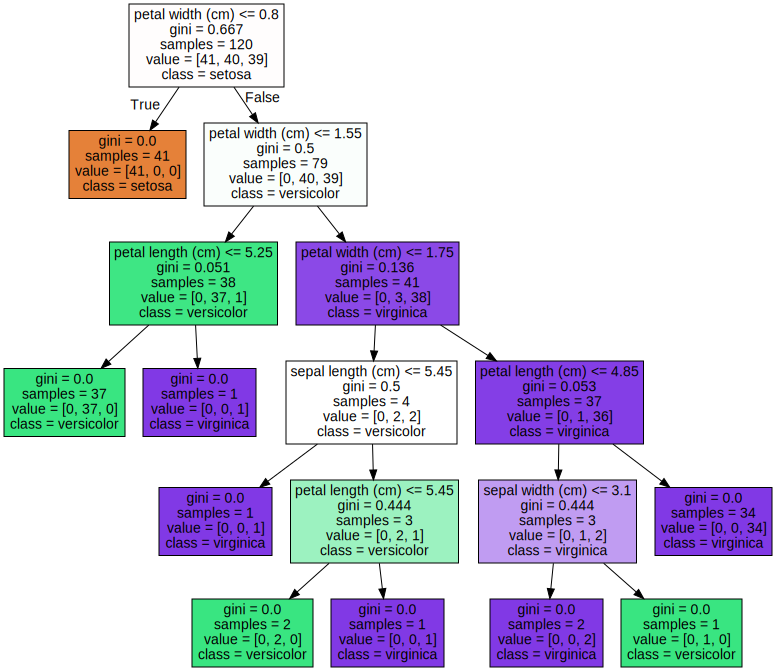

In [14]:
## Graphviz로 모델 시각화 - 결정 트리 모델이 어떻게 훈련했는지 시각화해서 보여준다.
# 코랩에는 자동으로 설치되어 있고, 윈도우는 따로 설치 필요

# 모델의 훈련에 대한 시각화 파일을 특정 경로에 저장
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, # 시각화할 모델
    out_file="tree.dot", # 시각화 결과물을 저장할 파일의 경로, 코드 실행 후 코랩 좌측 파일탭에서 확인 가능
    class_names = target_names, # 문자열로 된 각 타겟 클래스의 이름을 가진 리스트
    feature_names = feature_names, # 문자열로 된 각 피쳐의 이름을 가진 리스트
    impurity=True,
    filled=True
)

# export_graphviz를 이용해 만든 시각화 파일 불러오기
import graphviz
with open('tree.dot') as f:
  dot_graph = f.read()

# 불러온 시각화 파일 보기
graphviz.Source(dot_graph)

In [15]:
## 타겟 클래스명 확인
# 차례대로 0번, 1번, 2번 클래스명이 무엇이지 확인할 수 있다.
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- Graphviz로 결정 트리 모델에 훈련되어 적용된 분류 규칙을 확인할 수 있다.
- `value`에는 타겟 클래스별 가지고 있는 데이터의 개수가 리스트형태로 나타난다.
  - 리스트의 인덱스를 타겟 클래스의 번호로 사용한다.
  - 리프 노드의 `value`에는 하나의 클래스의 데이터로만 분류되어 지니 계수가 0인 균일한 상태인 것을 확인할 수 있다.
- `class=타겟클래스명` : 어떤 타겟 클래스로 분류되었는지 확인할 수 있다.
  - 두 개 이상의 클래스로 분류되었을 경우, 특정 클래스의 개수가 더 많은 클래스로 분류된다.

In [16]:
# 각 피쳐 데이터를 반환되는 리스트
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 각 피쳐 데이터를 반환하는 리스트의 요소를 차례대로 `x1`, `x2`, `x3`, `x4`라고 했을 때

In [17]:
dt_clf.feature_importances_

array([0.00833507, 0.01667014, 0.04867657, 0.92631822])

- 반환되는 리스트 차례대로 피쳐 데이터의 `x1`, `x2`, `x3`, `x4`의 중요도이다.
- 모델의 특성 중요도를 확인하니 `x3`(`petal length (cm)`)의 중요도가 가장 높다.
  - 머신러닝 알고리즘의 입장에서 `x3` 피쳐 데이터만 가지고 데이터를 분할했을 때 가장 균일하게 분할할 수 있어 가장 중요하게 생각한다는 것이다.

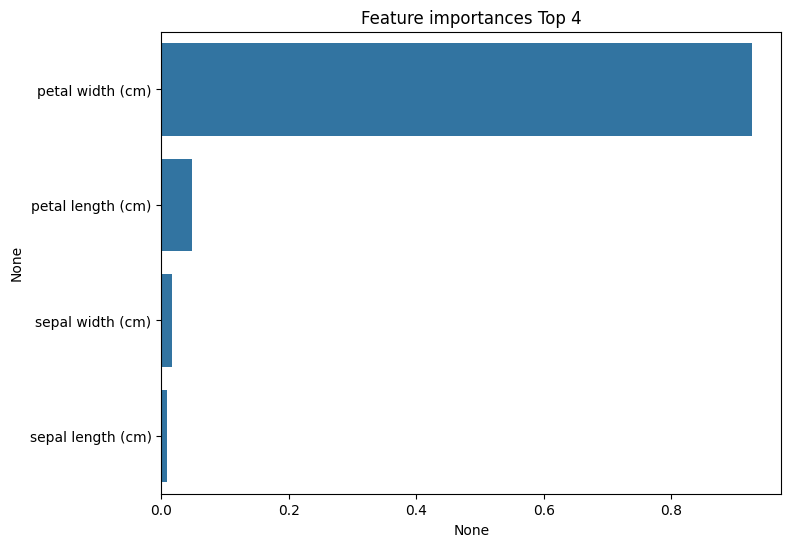

In [18]:
import matplotlib.pyplot as plt

# 특성 중요도 시각화로 확인할 수 있는 함수 정의
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf, feature_names)

In [19]:
# seaborn으로 붗꽃 데이터의 피처별 분류에 대한 시각화 확인
import seaborn as sns

iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['target'] = target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


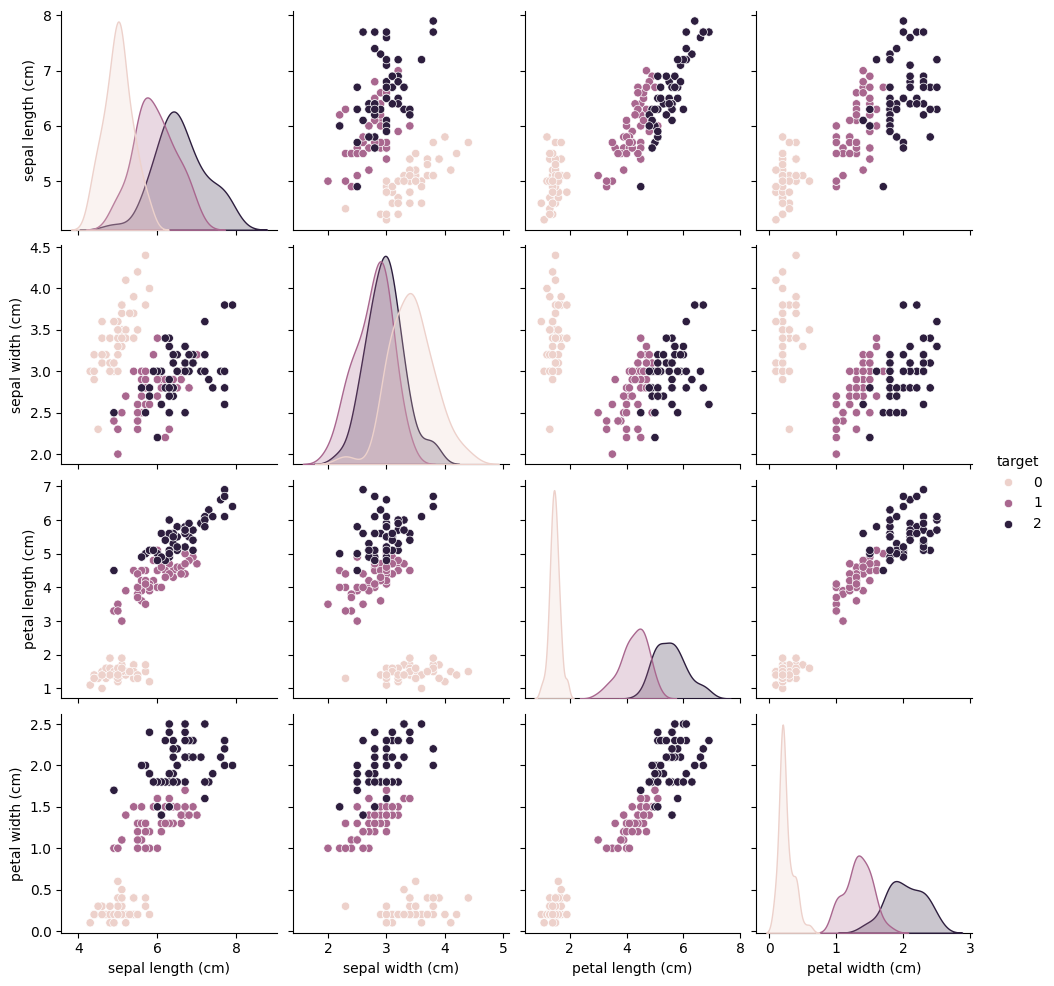

In [20]:
sns.pairplot(
  iris_df, hue='target', height=2.5
)

In [21]:
## 모델 예측
# 학습한 데이터에 대한 예측
train_pred = dt_clf.predict(X_train)
# 학습하지 않은 새로운 데이터에 대한 예측
test_pred = dt_clf.predict(X_test)

## 모델의 정확도 확인
from sklearn.metrics import accuracy_score

# 훈련 세트에 대한 예측 정확도 점수, 테스트 세트에 대한 예측 정확도 점수
accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(1.0, 0.9333333333333333)

- 하이퍼 파라미터를 지정하지 않은 결정 트리 모델은 항상 과대적합한 상태이다.
  - 결정 트리 모델의 훈련 데이터의 정확도는 100%가 나올 수 밖에 없다.
  - 모델 복잡도가 최상인 상태이다.
- 분류하지 않아도 되는 이상값까지 훈련한 과대적합 상태이기 때문에, 새로운 데이터인 테스트 데이터의 정확도가 훈련 데이터 정확도보다 낮게 나온다.


### 하이퍼 파라미터 지정 - `max_depth=2`


In [22]:
## 하이퍼 파라미터 지정하여 결정트리 모델 객체 생성
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2)

## 모델 학습
dt_clf_depth_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

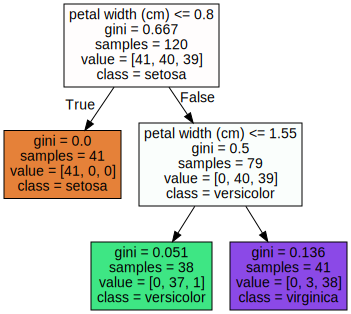

In [23]:
## Grapviz으로 결정 트리모델이 훈련된 분류 규칙 시각화

# 편의를 위해 graphviz_model 함수 정의 - 모델의 훈련에 대한 Grapviz 시각화 파일 생성, 불러오기, 보여주기
def graphviz_model(model,target_names, feature_names):
  export_graphviz(
      model,
      out_file="tree.dot",
      class_names=target_names,
      feature_names=feature_names,
      impurity=True,
      filled=True
  )
  import graphviz
  with open("tree.dot") as f:
    dot_graph = f.read()
  graphviz_model = graphviz.Source(dot_graph)
  return graphviz_model

graphviz_model(dt_clf_depth_2, target_names, feature_names)

In [24]:
## 모델 예측
# 편의를 위해 모델의 학습 데이터에 대한 예측/새로운 데이터에 대한 예측을 반환하는 함수 정의
def model_pred(model, X_train, X_test):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  return train_pred, test_pred

# 학습한 데이터에 대한 예측, 학습하지 않은 새로운 데이터에 대한 예측
train_pred_depth_2, test_pred_depth_2 = model_pred(dt_clf_depth_2, X_train, X_test)

## 모델의 정확도 확인
# 편의를 위해 모델의 훈련 세트/테스트 세트에 대한 예측 정확도 점수를 반환하는 함수 정의
def model_accuracy_score(train_pred, test_pred):
  train_pred_accuracy_score = accuracy_score(y_train, train_pred)
  test_pred_accuracy_score = accuracy_score(y_test, test_pred)
  return train_pred_accuracy_score, test_pred_accuracy_score

# 훈련 세트에 대한 예측 정확도 점수, 테스트 세트에 대한 예측 정확도 점수 확인
model_accuracy_score(train_pred_depth_2, test_pred_depth_2)

(0.9666666666666667, 0.8666666666666667)

- 결정 트리 모델의 하이퍼 파라미터를 지정하지 않았을 때보다 훈련 세트에 대한 예측 정확도가 떨어지긴 했지만, 하이퍼 파라미터를 튜닝하면서 일반화된 모델을 찾는 것이 중요하다.

- 참고로 붗꽃 데이터는 데이터의 개수 자체가 많지 않은 편이다.

## 4. 결정 트리 실습 2

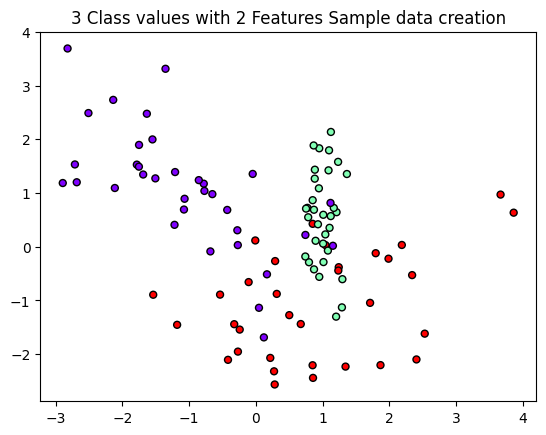

In [25]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

- 데이터의 추세로만 분류하면 좌상단 보라색 데이터, 우상단 초록색 데이터, 하단의 빨간색 데이터 정도로 분할할 수 있을 듯 하다.
  - 오류(오차) 데이터는 무시

### 1. 하이퍼 파라미터 지정X
- 과적합 상태의 결정 트리 모델의 학습된 영역을 시각화해서 확인

In [26]:
# 결정 트리 모델 객체 생성
dt_clf = DecisionTreeClassifier()

# 모델 학습
dt_clf.fit(X_features, y_labels)

DecisionTreeClassifier()

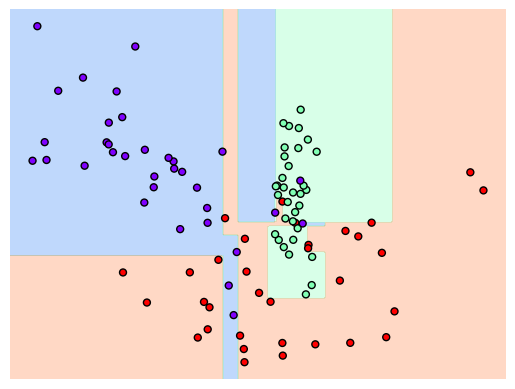

In [27]:
## 학습된 모델의 영역을 시각화해주는 visualize_boundary 함수 사용해서 확인
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

visualize_boundary(dt_clf, X_features, y_labels)

- 하이퍼 파라미터 지정을 안 했을 경우, 모델의 복잡도가 높아져 가운데 이상치로 보이는 데이터 포인트들을 일일히 분류하려고 노력하여 과대적합인 상태가 된다.

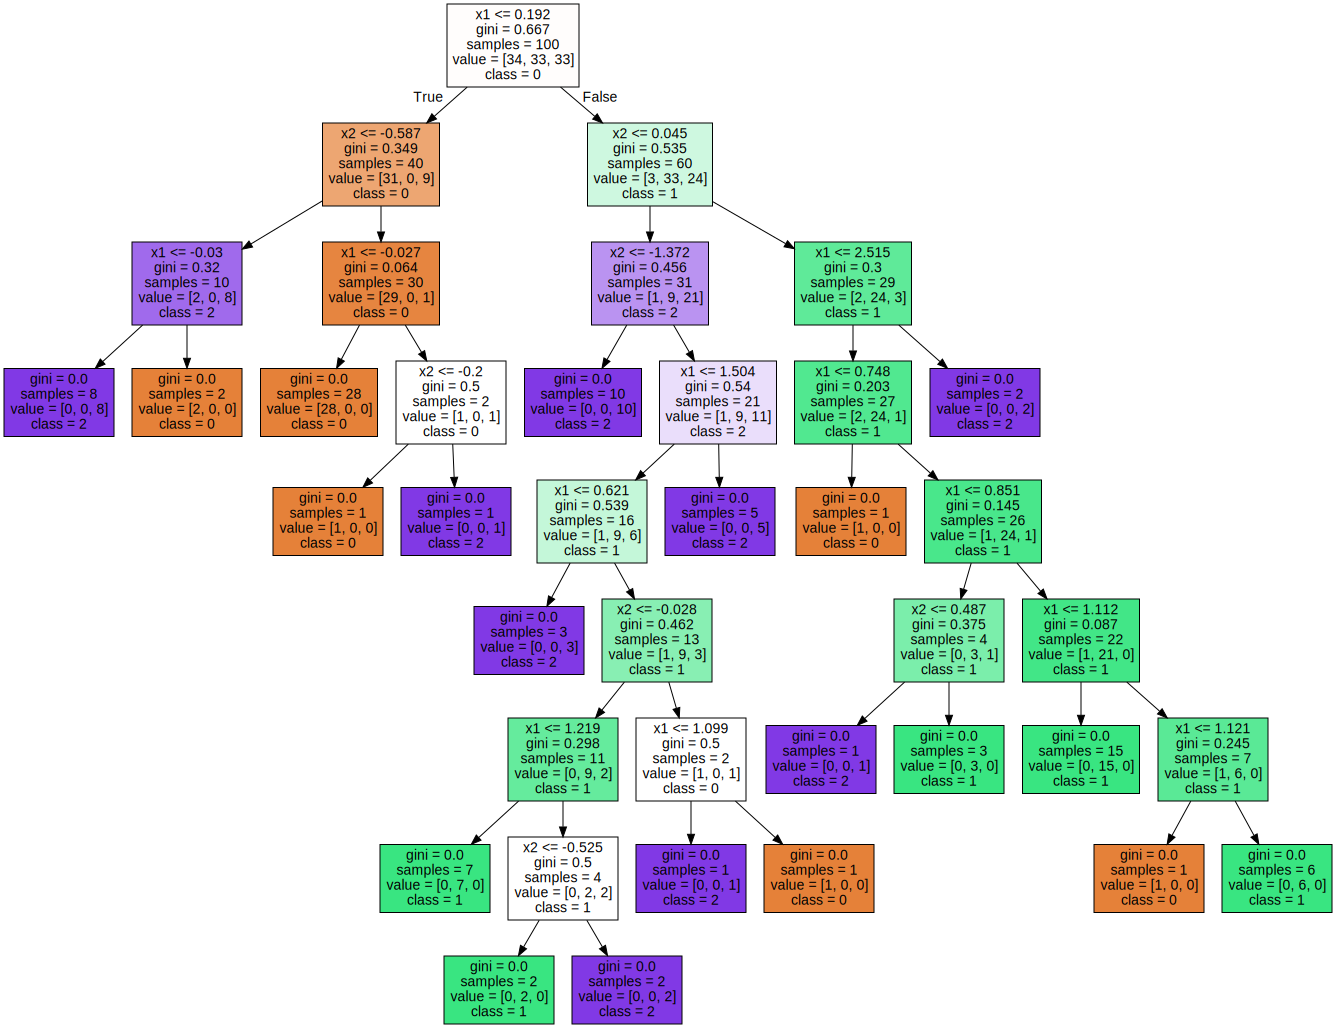

In [28]:
# 위에서 정의한 함수를 활용해 모델의 훈련에 대한 Grapviz 시각화 파일 생성, 불러오기, 보여주기
graphviz_model(dt_clf, ["0", "1", "2"], ["x1", "x2"])

- 단순한 2차원 데이터일 뿐이지만 트리의 depth가 아주 깊게 되어있다.
- 결정 트리 모델이 데이터를 복잡하게 해석하고 있다는 것을 확인할 수 있다.

### 2. `max_depth=1`일 경우

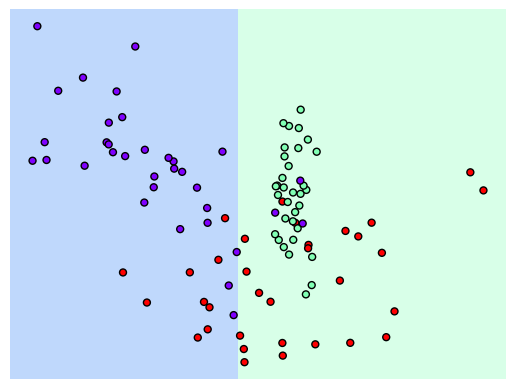

In [29]:
dt_clf_depth_1 = DecisionTreeClassifier(max_depth=1).fit(X_features, y_labels)
visualize_boundary(dt_clf_depth_1, X_features, y_labels)

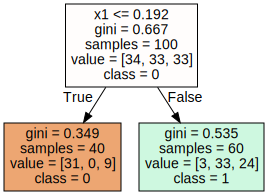

In [30]:
graphviz_model(dt_clf_depth_1, ["0", "1", "2"], ["x1", "x2"])

- 결정 트리 모델의 하이퍼 파라미터 `max_depth=1`일 경우
  - 너무 단순하게 데이터를 분류하여 과소적합된 상황이다.
  - 훈련 데이터 예측값의 정확도, 테스트 데이터 예측값의 정확도 둘 다 낮을 것으로 예상된다.

### 3. `max_depth=2`일 경우

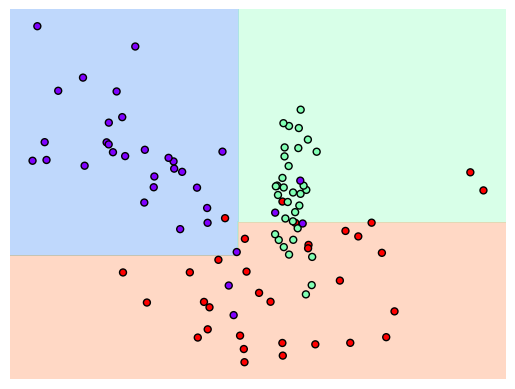

In [31]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
visualize_boundary(dt_clf_depth_2, X_features, y_labels)

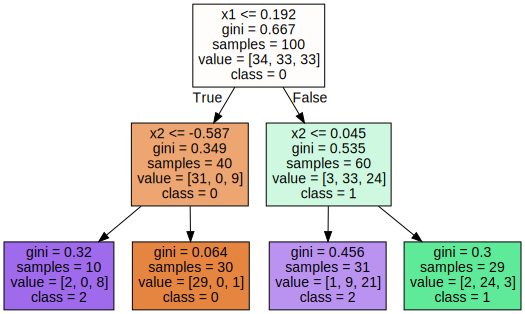

In [32]:
graphviz_model(dt_clf_depth_2, ["0", "1", "2"], ["x1", "x2"])

- 모델의 훈련에 대해 데이터가 나눠진 영역을 확인해보면 `max_depth=1`보다 일반화된 상태라고 볼 수 있다.
- 하이퍼 파라미터 조절을 통해 과대적합과 과소적합의 중간의 적당한 지점의 일반화된 상태를 찾아내는 것이 AI/ML 엔지니어의 목표이다.

### 4. `min_samples_split=20`일 경우

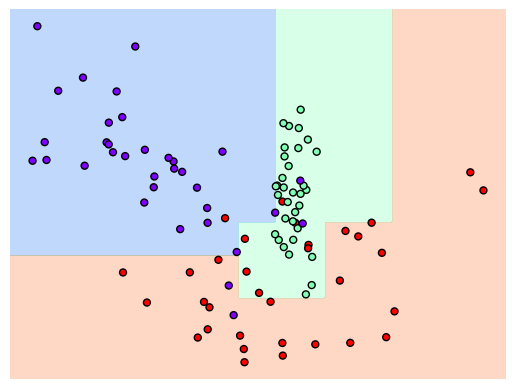

In [33]:
dt_clf_samp_split_20 = DecisionTreeClassifier(min_samples_split=20).fit(X_features, y_labels)
visualize_boundary(dt_clf_samp_split_20, X_features, y_labels)

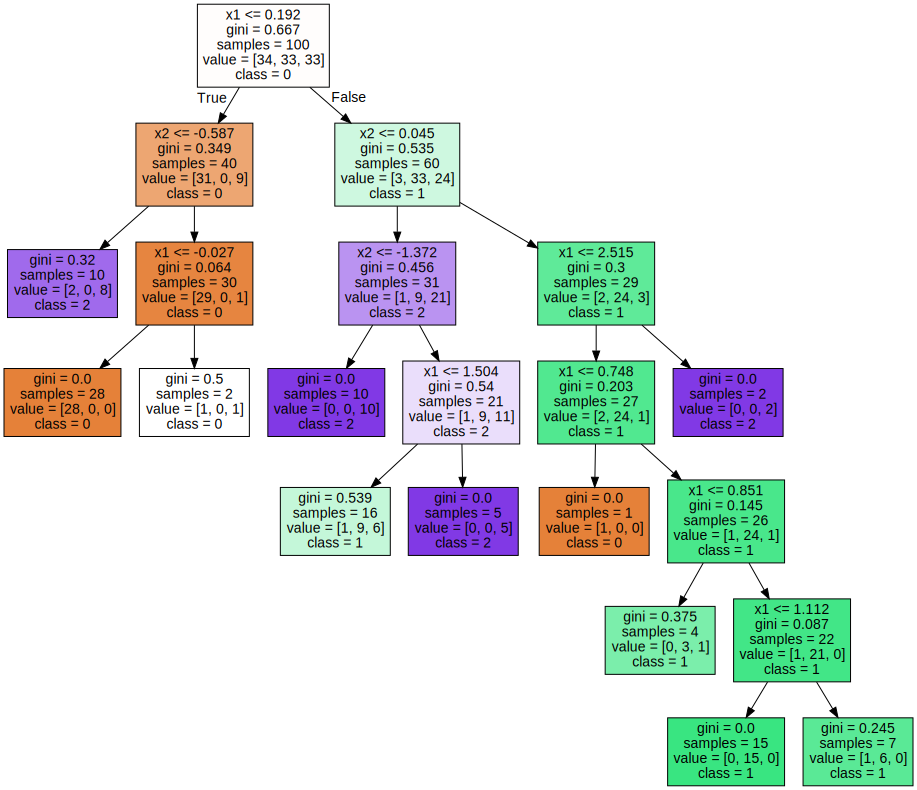

In [34]:
graphviz_model(dt_clf_samp_split_20, ["0", "1", "2"], ["x1", "x2"])

- 2 depth에서 제일 왼쪽에 위치한 보라색 노드를 확인하면, 노드의 데이터 개수가 `samples = 10`로 `min_samples_split=20`보다 개수가 적기 때문에 더이상 규칙을 생성하지 않고 리프노드로 결정된다.
- 3 depth에서 제일 왼쪽에 있는 주황색 노드를 확인하면, 노드의 데이터 개수가 `samples = 28`로 `min_samples_split=20`보다 개수가 많지만, `value`를 확인해 보면 특정 타겟의 클래스만 데이터가 있어 지니 계수가 0이 되어 더이상 데이터를 분할할 조건이 없어져 리프 노드가 된다.

### 5. `min_samples_leaf=6`일 경우
- 규칙노드가 분할되기 위해 가지고 있어야 할 최소한의 샘플 데이터 개수

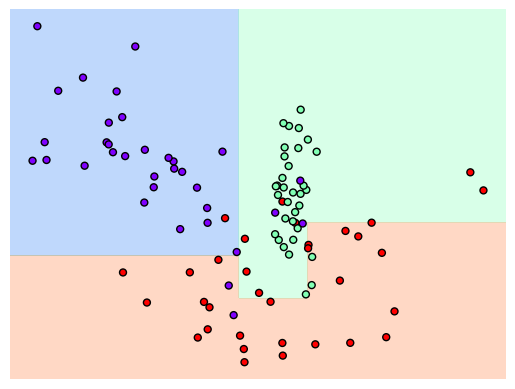

In [35]:
dt_clf_samp_leaf_6 = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf_samp_leaf_6, X_features, y_labels)

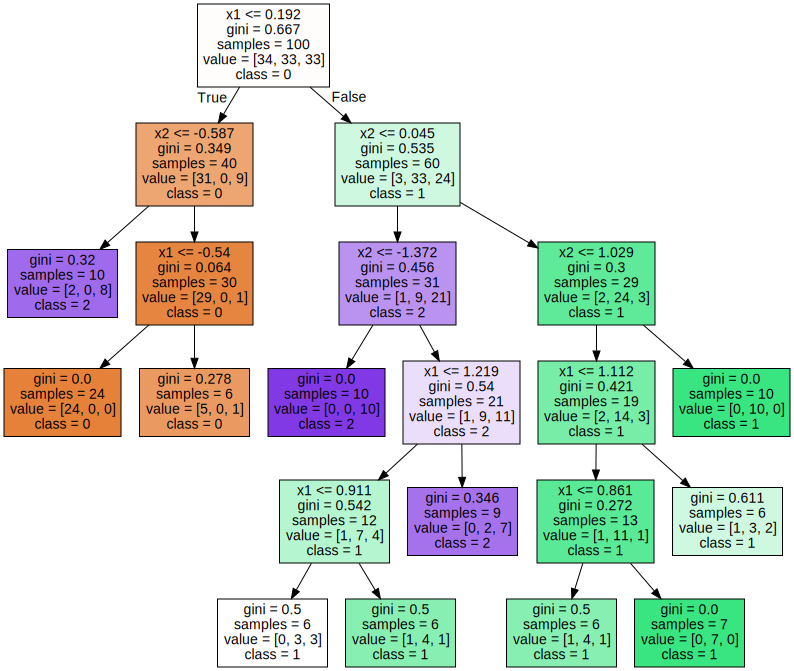

In [36]:
graphviz_model(dt_clf_samp_leaf_6, ["0", "1", "2"], ["x1", "x2"])

- 3 depth에서 제일 왼쪽에 위치한 주황색 노드는 `samples = 10`이다. 만약 이 노드를 분할할 경우 분할된 노드의 최대개수는 `min_samples_leaf`를 만족하지 못하기 때문에 더이상 분할되지 않고 리프 노드로 결정된다.